In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt# Load the trained model
model = load_model('braintumor.h5')

# Labels for the classes
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


from tensorflow.keras.preprocessing import image



In [2]:
# Load the trained model
model = load_model('braintumor.h5')

# Labels for the classes
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']



In [3]:
# Function to preprocess the input image
def preprocess_image(img_path, target_size=(150, 150)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img_array = np.array(img)
    img_array = img_array.reshape(1, target_size[0], target_size[1], 3)
    img_array = preprocess_input(img_array)
    return img_array



In [4]:
# Function to make predictions
def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction



In [5]:
# Path to the test image
test_img_path = r"C:\brain-tumor-detection\Training\meningioma_tumor\m1(95).jpg"



In [6]:
# Make a prediction
prediction = predict_image(model, test_img_path)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)



1/1 [==============================] - 1s 700ms/step


Predicted class: Tumor
Prediction confidence: [[3.4051934e-34 1.0000000e+00 5.3347186e-38 0.0000000e+00]]


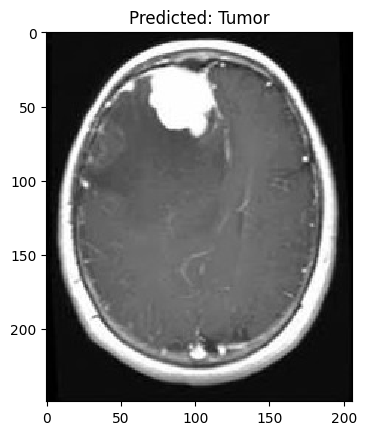

In [7]:
# Determine if it's a tumor or not
if labels[predicted_class[0]] == 'no_tumor':
    predicted_label = 'No Tumor'
else:
    predicted_label = 'Tumor'

# Print the prediction
print(f"Predicted class: {predicted_label}")
print(f"Prediction confidence: {prediction}")

# Visualize the image
img = image.load_img(test_img_path)
plt.imshow(img, interpolation='nearest')
plt.title(f"Predicted: {predicted_label}")
plt.show()


In [8]:
import cv2
import numpy as np

# Load the MRI image
image_path = r"C:\brain-tumor-detection\Testing\meningioma_tumor\image(77).jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
cv2.imshow('Binary MRI Image', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally, save the binary image
cv2.imwrite('binary_mri_image.jpg', binary)


True

In [9]:
import cv2
import numpy as np

# Load the MRI image
image_path = r"C:\brain-tumor-detection\Testing\meningioma_tumor\image(77).jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness=2)

# Display the result
cv2.imshow('Tumor Area Boundaries', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Optionally, save the result
cv2.imwrite('tumor_area_boundaries.jpg', image)


True

In [37]:
import cv2
import numpy as np

# Load the MRI image
image_path = r"C:\brain-tumor-detection\Training\meningioma_tumor\m1(90).jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw outer contours in green and inner contours in blue on the original image
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > 1000:  # Filter out small contours
        color = (0, 255, 0) if i == 0 else (255, 0, 0)  # Green for outer, Blue for inner contours
        cv2.drawContours(image, [contour], -1, color, thickness=2)

# Display the result
cv2.imshow('Tumor Area Boundaries', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally, save the result
cv2.imwrite('tumor_area_boundaries.jpg', image)


True

In [30]:
import cv2
import numpy as np

# Load the image
image_path = r"C:\brain-tumor-detection\Training\meningioma_tumor\m1(95).jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



In [31]:

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



In [32]:
# # Draw contours on the original image
# cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# # Display the result
# cv2.imshow('Highlighted Tumor Area', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [33]:
# import cv2
# import numpy as np

# # Load the image
# image_path = r"C:\brain-tumor-detection\Training\meningioma_tumor\m1(95).jpg"
# image = cv2.imread(image_path)

# # Convert to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur to reduce noise and improve contour detection
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# # Apply adaptive thresholding
# binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

# # Find contours
# contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Create a mask to filter contours within the tumor region
# tumor_mask = np.zeros_like(gray)
# for contour in contours:
#     area = cv2.contourArea(contour)
#     if area > 1000:  # Adjust the threshold based on your specific case
#         cv2.drawContours(tumor_mask, [contour], -1, 255, thickness=cv2.FILLED)

# # Apply the mask to the original image
# result = cv2.bitwise_and(image, image, mask=tumor_mask)

# # Display the result
# cv2.imshow('Highlighted Tumor Area', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


1/1 [==============================] - 0s 435ms/step
Predicted class: Tumor
Prediction confidence: [[3.4051934e-34 1.0000000e+00 5.3347186e-38 0.0000000e+00]]
Tumor to brain size ratio: 0.0980


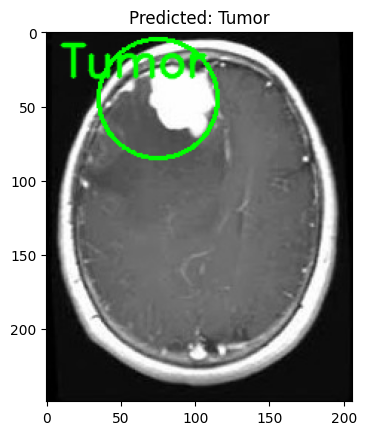

In [38]:
# import numpy as np
# import cv2
# from tensorflow.keras.models import load_model
# from tensorflow.keras.applications.resnet50 import preprocess_input
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image

# # Load the trained model
# model = load_model('braintumor.h5')

# # Labels for the classes
# labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# # Function to preprocess the input image
# def preprocess_image(img_path, target_size=(150, 150)):
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, target_size)
#     img_array = np.array(img)
#     img_array = img_array.reshape(1, target_size[0], target_size[1], 3)
#     img_array = preprocess_input(img_array)
#     return img_array

# # Function to make predictions
# def predict_image(model, img_path):
#     img_array = preprocess_image(img_path)
#     prediction = model.predict(img_array)
#     return prediction

# # Function to draw a circle on the image
# def draw_circle(img_path, label, center, radius):
#     img = cv2.imread(img_path)
    
#     # Draw a circle around the tumor area
#     color = (0, 255, 0)  # Green color for the circle
#     thickness = 2
    
#     img = cv2.circle(img, center, radius, color, thickness)
    
#     # Add label
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     font_scale = 1
#     font_thickness = 2
#     img = cv2.putText(img, label, (10, 30), font, font_scale, color, font_thickness, cv2.LINE_AA)
    
#     return img

# # Path to the test image
# test_img_path = r"C:\brain-tumor-detection\Training\meningioma_tumor\m1(95).jpg"

# # Make a prediction
# prediction = predict_image(model, test_img_path)

# # Get the predicted class
# predicted_class = np.argmax(prediction, axis=1)

# # Determine if it's a tumor or not
# if labels[predicted_class[0]] == 'no_tumor':
#     predicted_label = 'No Tumor'
#     tumor_present = False
# else:
#     predicted_label = 'Tumor'
#     tumor_present = True

# # Print the prediction
# print(f"Predicted class: {predicted_label}")
# print(f"Prediction confidence: {prediction}")

# # Visualize the image with a circle if tumor is present
# if tumor_present:
#     # Dummy coordinates and radius
#     center_coordinates = (75, 45)  # Example coordinates, should be replaced with actual detection output
#     radius = 40  # Example radius, should be based on the detected tumor size
#     img_with_circle = draw_circle(test_img_path, predicted_label, center_coordinates, radius)
#     plt.imshow(cv2.cvtColor(img_with_circle, cv2.COLOR_BGR2RGB))
# else:
#     img = image.load_img(test_img_path)
#     plt.imshow(img, interpolation='nearest')

# plt.title(f"Predicted: {predicted_label}")
# plt.show()
















import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('braintumor.h5')

# Labels for the classes
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(150, 150)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img_array = np.array(img)
    img_array = img_array.reshape(1, target_size[0], target_size[1], 3)
    img_array = preprocess_input(img_array)
    return img_array

# Function to make predictions
def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction

# Function to draw a circle on the image
def draw_circle(img_path, label, center, radius):
    img = cv2.imread(img_path)

    color = (0, 255, 0)  # Green color for the circle
    thickness = 2
    
    img = cv2.circle(img, center, radius, color, thickness)
    
    # Add label
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    img = cv2.putText(img, label, (10, 30), font, font_scale, color, font_thickness, cv2.LINE_AA)
    
    return img

# Function to calculate the ratio of tumor size to brain size
def calculate_tumor_brain_ratio(image_size, tumor_radius):
    brain_area = image_size[0] * image_size[1]
    tumor_area = np.pi * (tumor_radius ** 2)
    ratio = tumor_area / brain_area
    return ratio

# Path to the test image
test_img_path = r"C:\brain-tumor-detection\Training\meningioma_tumor\m1(95).jpg"

# Make a prediction
prediction = predict_image(model, test_img_path)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

# Determine if it's a tumor or not
if labels[predicted_class[0]] == 'no_tumor':
    predicted_label = 'No Tumor'
    tumor_present = False
else:
    predicted_label = 'Tumor'
    tumor_present = True

# Print the prediction
print(f"Predicted class: {predicted_label}")
print(f"Prediction confidence: {prediction}")

# Visualize the image with a circle if tumor is present
img = cv2.imread(test_img_path)
image_size = img.shape[:2]  # (height, width)

if tumor_present:
    # Dummy coordinates and radius
    center_coordinates = (75, 45)  # Example coordinates, should be replaced with actual detection output
    radius = 40  # Example radius, should be based on the detected tumor size
    img_with_circle = draw_circle(test_img_path, predicted_label, center_coordinates, radius)
    
    # Calculate the ratio of tumor size to brain size
    ratio = calculate_tumor_brain_ratio(image_size, radius)
    print(f"Tumor to brain size ratio: {ratio:.4f}")
    
    plt.imshow(cv2.cvtColor(img_with_circle, cv2.COLOR_BGR2RGB))
else:
    img = image.load_img(test_img_path)
    plt.imshow(img, interpolation='nearest')

plt.title(f"Predicted: {predicted_label}")
plt.show()



In [16]:
# import numpy as np
# import cv2
# from tensorflow.keras.models import load_model
# from tensorflow.keras.applications.resnet50 import preprocess_input
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image

# # Load the trained model
# model = load_model('braintumor.h5')

# # Labels for the classes
# labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# # Function to preprocess the input image
# def preprocess_image(img_path, target_size=(150, 150)):
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, target_size)
#     img_array = np.array(img)
#     img_array = img_array.reshape(1, target_size[0], target_size[1], 3)
#     img_array = preprocess_input(img_array)
#     return img_array

# # Function to make predictions
# def predict_image(model, img_path):
#     img_array = preprocess_image(img_path)
#     prediction = model.predict(img_array)
#     return prediction

# # Function to find the largest contour which is assumed to be the tumor
# def find_largest_contour(img_path):
#     img = cv2.imread(img_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
#     # Apply adaptive thresholding
#     thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
#     # Apply morphological operations to remove noise and small artifacts
#     kernel = np.ones((3, 3), np.uint8)
#     opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
#     closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
    
#     contours, _ = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     if len(contours) == 0:
#         return None, None
    
#     largest_contour = max(contours, key=cv2.contourArea)
#     return largest_contour, img

# # Function to draw the contour and calculate tumor size
# def draw_contour_and_calculate_size(img, contour):
#     mask = np.zeros(img.shape[:2], dtype=np.uint8)
#     cv2.drawContours(mask, [contour], -1, 255, -1)
    
#     # Calculate the bounding box of the contour
#     x, y, w, h = cv2.boundingRect(contour)
#     center_coordinates = (x + w // 2, y + h // 2)
#     radius = int(max(w, h) // 2)
    
#     color = (0, 255, 0)  # Green color for the circle
#     thickness = 2
    
#     img_with_contour = cv2.circle(img, center_coordinates, radius, color, thickness)
    
#     # Calculate tumor area
#     tumor_area = cv2.contourArea(contour)
#     brain_area = img.shape[0] * img.shape[1]
#     ratio = tumor_area / brain_area
    
#     return img_with_contour, tumor_area, ratio

# # Path to the test image
# test_img_path = r"C:\brain-tumor-detection\Testing\meningioma_tumor\image(112).jpg"

# # Make a prediction
# prediction = predict_image(model, test_img_path)

# # Get the predicted class
# predicted_class = np.argmax(prediction, axis=1)

# # Determine if it's a tumor or not
# if labels[predicted_class[0]] == 'no_tumor':
#     predicted_label = 'No Tumor'
#     tumor_present = False
# else:
#     predicted_label = 'Tumor'
#     tumor_present = True

# # Print the prediction
# print(f"Predicted class: {predicted_label}")
# print(f"Prediction confidence: {prediction}")

# # Visualize the image with a circle if tumor is present
# if tumor_present:
#     contour, img = find_largest_contour(test_img_path)
#     if contour is not None:
#         img_with_contour, tumor_area, ratio = draw_contour_and_calculate_size(img, contour)
#         print(f"Tumor to brain size ratio: {ratio:.4f}")
        
#         plt.imshow(cv2.cvtColor(img_with_contour, cv2.COLOR_BGR2RGB))
#     else:
#         print("No tumor detected by contour detection.")
#         img = image.load_img(test_img_path)
#         plt.imshow(img, interpolation='nearest')
# else:
#     img = image.load_img(test_img_path)
#     plt.imshow(img, interpolation='nearest')

# plt.title(f"Predicted: {predicted_label}")
# plt.show()


In [17]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image



In [18]:
# # Load YOLO
# net = cv2.dnn.readNet("C:/brain-tumor-detection/yolov3.weights", "C:/brain-tumor-detection/yolov3.cfg")
# classes = []
# with open("C:/brain-tumor-detection/coco.names", "r") as f:
#     classes = [line.strip() for line in f.readlines()]


In [19]:

# layer_names = net.getLayerNames()
# output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# # Load brain tumor classification model
# model = load_model("braintumor.h5")
# class_names = ['no_tumor', 'tumor']  # Assuming your model outputs these classes


In [20]:

# # Load image
# image_path = r"C:/brain-tumor-detection/Testing/meningioma_tumor/image(112).jpg"
# img = cv2.imread(image_path)
# height, width, channels = img.shape

In [21]:
# # Detect objects using YOLO
# blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
# net.setInput(blob)
# outs = net.forward(output_layers)


In [22]:
# # Process each detection
# for out in outs:
#     for detection in out:
#         scores = detection[5:]
#         class_id = np.argmax(scores)
#         confidence = scores[class_id]
#         if confidence > 0.5:
#             # Object detected
#             center_x = int(detection[0] * width)
#             center_y = int(detection[1] * height)
#             w = int(detection[2] * width)
#             h = int(detection[3] * height)

#             # Circle coordinates
#             radius = max(w, h) // 2
#             cv2.circle(img, (center_x, center_y), radius, (0, 255, 0), 2)

#             # Extract ROI and classify with braintumor.h5
#             x = max(0, center_x - radius)
#             y = max(0, center_y - radius)
#             roi = img[y:y+2*radius, x:x+2*radius]
#             roi = cv2.resize(roi, (224, 224))  # Assuming braintumor.h5 model input size
#             roi = roi / 255.0  # Normalize if necessary based on how braintumor.h5 was trained

#             # Predict using braintumor.h5 model
#             roi_expanded = np.expand_dims(roi, axis=0)
#             pred = model.predict(roi_expanded)[0]
#             pred_class = np.argmax(pred)
#             pred_label = class_names[pred_class]
#             pred_confidence = pred[pred_class]

#             # Overlay prediction on image
#             label = f"{pred_label}: {pred_confidence:.2f}"
#             cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


In [23]:

# # Show the image with detected objects and classifications
# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [24]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model

# # Load YOLO
# net = cv2.dnn.readNet("C:/brain-tumor-detection/yolov3.weights", "C:/brain-tumor-detection/yolov3.cfg")
# classes = []
# with open("C:/brain-tumor-detection/coco.names", "r") as f:
#     classes = [line.strip() for line in f.readlines()]

# layer_names = net.getLayerNames()
# output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# # Load brain tumor classification model
# model = load_model("braintumor.h5")
# class_names = ['no_tumor', 'tumor']  # Assuming your model outputs these classes

# # Load image
# image_path = r"C:/brain-tumor-detection/Testing/meningioma_tumor/image(112).jpg"
# img = cv2.imread(image_path)
# height, width, channels = img.shape

# # Detect objects using YOLO
# blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
# net.setInput(blob)
# outs = net.forward(output_layers)

# # Process each detection
# for out in outs:
#     for detection in out:
#         scores = detection[5:]
#         class_id = np.argmax(scores)
#         confidence = scores[class_id]
#         if confidence > 0.5:
#             # Object detected
#             center_x = int(detection[0] * width)
#             center_y = int(detection[1] * height)
#             w = int(detection[2] * width)
#             h = int(detection[3] * height)

#             # Coordinates for bounding box
#             x = int(center_x - w / 2)
#             y = int(center_y - h / 2)

#             # Draw bounding box and label on image
#             color = (0, 255, 0)  # Green color for bounding box
#             cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

#             # Extract ROI for tumor classification
#             roi = img[y:y+h, x:x+w]
#             roi = cv2.resize(roi, (224, 224))
#             roi = roi.astype('float32') / 255.0
#             roi = np.expand_dims(roi, axis=0)

#             # Predict using brain tumor classification model
#             prediction = model.predict(roi)
#             prediction_label = class_names[np.argmax(prediction)]
#             prediction_confidence = np.max(prediction)

#             # Overlay prediction on bounding box
#             text = f"{prediction_label}: {prediction_confidence:.2f}"
#             cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# # Show the image with detected objects and classifications
# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [25]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
# import matplotlib.pyplot as plt

# # Load YOLO
# net = cv2.dnn.readNet("C:/brain-tumor-detection/yolov3.weights", "C:/brain-tumor-detection/yolov3.cfg")
# classes = []
# with open("C:/brain-tumor-detection/coco.names", "r") as f:
#     classes = [line.strip() for line in f.readlines()]

# layer_names = net.getLayerNames()
# output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# # Load brain tumor classification model
# model = load_model("braintumor.h5")
# class_names = ['no_tumor', 'tumor']  # Assuming your model outputs these classes

# # Load image
# image_path = r"C:/brain-tumor-detection/Testing/meningioma_tumor/image(112).jpg"
# img = cv2.imread(image_path)
# height, width, channels = img.shape

# # Detect objects using YOLO
# blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
# net.setInput(blob)
# outs = net.forward(output_layers)

# # Process each detection
# for out in outs:
#     for detection in out:
#         scores = detection[5:]
#         class_id = np.argmax(scores)
#         confidence = scores[class_id]
#         if confidence > 0.5:
#             # Object detected
#             center_x = int(detection[0] * width)
#             center_y = int(detection[1] * height)
#             w = int(detection[2] * width)
#             h = int(detection[3] * height)

#             # Coordinates for bounding box
#             x = int(center_x - w / 2)
#             y = int(center_y - h / 2)

#             # Draw bounding box and label on image
#             color = (0, 255, 0)  # Green color for bounding box
#             cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
#             print(f"Bounding box: x={x}, y={y}, w={w}, h={h}, confidence={confidence}")

#             # Extract ROI for tumor classification
#             roi = img[y:y+h, x:x+w]
#             if roi.size == 0:
#                 print("Empty ROI, skipping...")
#                 continue
#             print(f"ROI shape: {roi.shape}")  # Debug print
#             roi = cv2.resize(roi, (224, 224))
#             roi = roi.astype('float32') / 255.0
#             roi = np.expand_dims(roi, axis=0)

#             # Predict using brain tumor classification model
#             prediction = model.predict(roi)
#             print(f"Prediction: {prediction}")  # Debug print
#             prediction_label = class_names[np.argmax(prediction)]
#             prediction_confidence = np.max(prediction)

#             # Overlay prediction on bounding box
#             text = f"{prediction_label}: {prediction_confidence:.2f}"
#             cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# # Convert BGR image to RGB
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Display image using matplotlib
# plt.figure(figsize=(10, 10))
# plt.imshow(img_rgb)
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()


In [26]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
# import matplotlib.pyplot as plt

# # Load YOLO
# net = cv2.dnn.readNet("C:/brain-tumor-detection/yolov3.weights", "C:/brain-tumor-detection/yolov3.cfg")
# classes = []
# with open("C:/brain-tumor-detection/coco.names", "r") as f:
#     classes = [line.strip() for line in f.readlines()]

# layer_names = net.getLayerNames()
# output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# # Load brain tumor classification model
# model = load_model("braintumor.h5")
# class_names = ['no_tumor', 'tumor']  # Assuming your model outputs these classes

# # Load image
# image_path = r"C:/brain-tumor-detection/Testing/meningioma_tumor/image(29).jpg"
# img = cv2.imread(image_path)
# height, width, channels = img.shape

# # Detect objects using YOLO
# blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
# net.setInput(blob)
# outs = net.forward(output_layers)

# # Debugging: Print raw output of YOLO
# print("YOLO raw output:")
# for out in outs:
#     print(out.shape)

# # Process each detection
# detections_found = False
# for out in outs:
#     for detection in out:
#         scores = detection[5:]
#         class_id = np.argmax(scores)
#         confidence = scores[class_id]
#         if confidence > 0.3:  # Lowered confidence threshold to 0.3
#             detections_found = True
#             # Object detected
#             center_x = int(detection[0] * width)
#             center_y = int(detection[1] * height)
#             w = int(detection[2] * width)
#             h = int(detection[3] * height)

#             # Coordinates for bounding box
#             x = int(center_x - w / 2)
#             y = int(center_y - h / 2)

#             # Draw bounding box and label on image
#             color = (0, 255, 0)  # Green color for bounding box
#             cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
#             print(f"Bounding box: x={x}, y={y}, w={w}, h={h}, confidence={confidence}")

#             # Extract ROI for tumor classification
#             roi = img[y:y+h, x:x+w]
#             if roi.size == 0:
#                 print("Empty ROI, skipping...")
#                 continue
#             print(f"ROI shape: {roi.shape}")  # Debug print
#             roi = cv2.resize(roi, (150, 150))  # Resize to 150x150 as required by the model
#             roi = roi.astype('float32') / 255.0
#             roi = np.expand_dims(roi, axis=0)

#             # Predict using brain tumor classification model
#             prediction = model.predict(roi)
#             print(f"Prediction: {prediction}")  # Debug print
#             prediction_label = class_names[np.argmax(prediction)]
#             prediction_confidence = np.max(prediction)

#             # Overlay prediction on bounding box
#             text = f"{prediction_label}: {prediction_confidence:.2f}"
#             cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# if not detections_found:
#     print("No detections found.")

# # Convert BGR image to RGB
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Display image using matplotlib
# plt.figure(figsize=(10, 10))
# plt.imshow(img_rgb)
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()


In [27]:
# import cv2

# # Path to the image
# image_path = r"C:\brain-tumor-detection\Testing\meningioma_tumor\image(112).jpg"

# # Load image
# img = cv2.imread(image_path)

# # Check if image is loaded successfully
# if img is None:
#     print(f"Error: Unable to load image from {image_path}")
# else:
#     # Get image dimensions
#     height, width, channels = img.shape
#     print(f"Image dimensions - Height: {height}, Width: {width}, Channels: {channels}")

In [28]:

# # Load image
# img = cv2.imread('path/to/image.jpg')
# height, width, channels = img.shape

# # Detecting objects
# blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
# net.setInput(blob)
# outs = net.forward(output_layers)

# # Information to display on screen
# class_ids = []
# confidences = []
# boxes = []
# for out in outs:
#     for detection in out:
#         scores = detection[5:]
#         class_id = np.argmax(scores)
#         confidence = scores[class_id]
#         if confidence > 0.5:
#             # Object detected
#             center_x = int(detection[0] * width)
#             center_y = int(detection[1] * height)
#             w = int(detection[2] * width)
#             h = int(detection[3] * height)

#             # Rectangle coordinates
#             x = int(center_x - w / 2)
#             y = int(center_y - h / 2)

#             boxes.append([x, y, w, h])
#             confidences.append(float(confidence))
#             class_ids.append(class_id)

# # Non-maximum suppression to eliminate redundant overlapping boxes with lower confidence scores
# indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# # Draw bounding boxes
# font = cv2.FONT_HERSHEY_PLAIN
# for i in range(len(boxes)):
#     if i in indexes:
#         x, y, w, h = boxes[i]
#         label = str(classes[class_ids[i]])
#         color = (0, 255, 0)
#         cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
#         cv2.putText(img, label, (x, y - 10), font, 1, color, 2)

# # Show the image
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()
